In [4]:
#import des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)

In [5]:
#importation des datasets

stress_dataset = pd.read_csv('Stress_Dataset.csv', sep=',', low_memory=False)
stress_level_dataset = pd.read_csv('StressLevelDataset.csv', sep=',', low_memory=False)

#On nettoie les données pour n'avoir que des personnes entre 18 et 25 ans, soit l'âge moyen des étudiants
stress_dataset = stress_dataset[stress_dataset["Age"] < 26 ]
stress_dataset = stress_dataset[stress_dataset["Age"] > 17]


#Remplacement des valeurs Gender par Male ou Female
stress_dataset["Gender"] = stress_dataset["Gender"].replace({0:'Male', 1:'Female'})

In [6]:
#Affichage des 10 premières lignes du dataset 1
stress_dataset.head(10)

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,Male,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,Male,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,Male,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,Female,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,Male,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...
5,Male,20,3,4,3,2,3,3,4,1,...,2,3,1,2,3,2,4,4,4,Eustress (Positive Stress) - Stress that motiv...
6,Male,20,2,2,1,4,4,3,4,1,...,4,4,2,3,4,3,3,3,2,Eustress (Positive Stress) - Stress that motiv...
7,Male,20,5,5,5,2,4,2,1,1,...,1,4,2,4,3,1,1,1,5,Eustress (Positive Stress) - Stress that motiv...
8,Male,20,3,2,1,5,3,5,1,1,...,4,4,2,4,4,3,1,5,1,Eustress (Positive Stress) - Stress that motiv...
9,Male,21,3,4,2,1,1,2,1,2,...,1,1,1,1,1,1,2,4,2,No Stress - Currently experiencing minimal to ...


In [7]:
# Analyse Simple du dataset Stress_Dataset.csv

print("Toutes les notes sont comprises entre 0 et 5 \n \n")
print("Pourcentage d'hommes répondant au questionnaire:", round((stress_dataset["Gender"].value_counts(normalize=True)["Male"])*100, 2), "%")
print("Pourcentage de femmes répondant au questionnaire:", round((stress_dataset["Gender"].value_counts(normalize=True)["Female"])*100, 2), "% \n")
print("Moyenne d'âge des personnes interrogées:", round(stress_dataset["Age"].mean(), 0), "ans")
print("Ecart type d'âge des personnes interrogées:", round(stress_dataset["Age"].std(), 0), "ans \n")
print("Moyenne taux de stress ressenti par les étudiants:", round(stress_dataset["Have you recently experienced stress in your life?"].mean(), 3), "\n")
moyennes = stress_dataset.groupby("Gender")["Have you recently experienced stress in your life?"].mean()
print("Moyenne taux de stress ressenti par les étudiants en fonction du genre:")
for genre, valeur in moyennes.items():
    print(f"{genre}: {round(valeur, 3)}")
moyennes = stress_dataset.groupby("Age")["Have you recently experienced stress in your life?"].mean()
print("\nMoyenne niveau de stress par age:")
for age, valeur in moyennes.items():
    print(f"{age} ans: {round(valeur, 3)}")
print("\n")
print("Moyenne problèmes de sommeil ressenti par les étudiants:", round(stress_dataset["Do you face any sleep problems or difficulties falling asleep?"].mean(), 3), "\n")

moyennes = stress_dataset.groupby("Age")["Do you face any sleep problems or difficulties falling asleep?"].mean()
print("Moyenne problèmes de sommeil par age:")
for age, valeur in moyennes.items():
    print(f"{age} ans: {round(valeur, 3)}")
print("\n")
moyennes = (stress_dataset["Which type of stress do you primarily experience?"].value_counts(normalize=True))*100
print("Pourcentage type de stress ressenti par les étudiants:")
for type_stress, valeur in moyennes.items():
    print(f"{type_stress}: {round(valeur, 2)} %")


Toutes les notes sont comprises entre 0 et 5 
 

Pourcentage d'hommes répondant au questionnaire: 64.62 %
Pourcentage de femmes répondant au questionnaire: 35.38 % 

Moyenne d'âge des personnes interrogées: 20.0 ans
Ecart type d'âge des personnes interrogées: 1.0 ans 

Moyenne taux de stress ressenti par les étudiants: 3.014 

Moyenne taux de stress ressenti par les étudiants en fonction du genre:
Female: 2.996
Male: 3.024

Moyenne niveau de stress par age:
18 ans: 2.9
19 ans: 2.884
20 ans: 3.179
21 ans: 3.074
22 ans: 3.148
24 ans: 3.0


Moyenne problèmes de sommeil ressenti par les étudiants: 2.784 

Moyenne problèmes de sommeil par age:
18 ans: 2.764
19 ans: 2.81
20 ans: 2.748
21 ans: 2.852
22 ans: 2.481
24 ans: 3.333


Pourcentage type de stress ressenti par les étudiants:
Eustress (Positive Stress) - Stress that motivates and enhances performance.: 91.32 %
No Stress - Currently experiencing minimal to no stress.: 4.85 %
Distress (Negative Stress) - Stress that causes anxiety and im

C:\Users\theab\AppData\Local\Temp\ipykernel_1632\2019643659.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




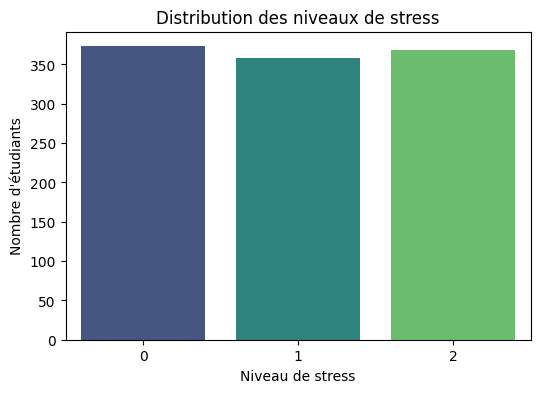

In [8]:
# 1. Distribution du stress_level

plt.figure(figsize=(6,4))
sns.countplot(x="stress_level", data=stress_level_dataset, palette="viridis")
plt.title("Distribution des niveaux de stress")
plt.xlabel("Niveau de stress")
plt.ylabel("Nombre d'étudiants")
plt.show()


C:\Users\theab\AppData\Local\Temp\ipykernel_1632\2682149712.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




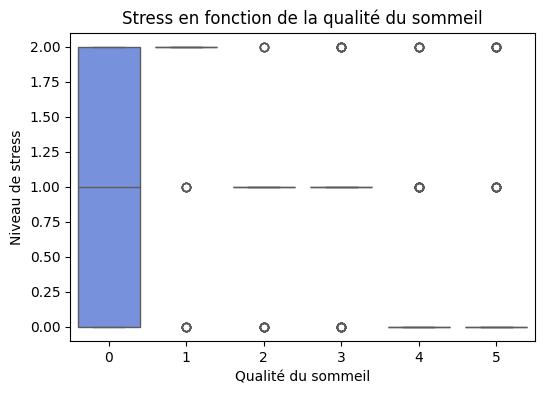

In [9]:
# 2. Relation entre la qualité du sommeil et le stress

plt.figure(figsize=(6,4))
sns.boxplot(x="sleep_quality", y="stress_level", data=stress_level_dataset, palette="coolwarm")
plt.title("Stress en fonction de la qualité du sommeil")
plt.xlabel("Qualité du sommeil")
plt.ylabel("Niveau de stress")
plt.show()


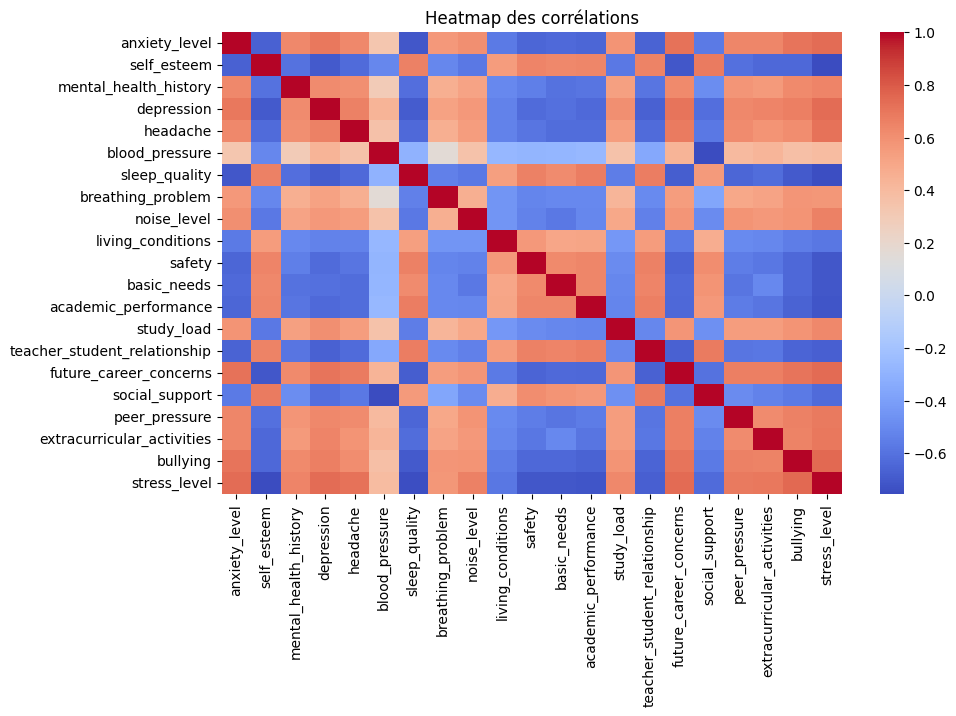

In [10]:
# 3. Corrélations entre variables
plt.figure(figsize=(10,6))
sns.heatmap(stress_level_dataset.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap des corrélations")
plt.show()
